# Midterm

Fernando Abarca & Ryan Caro

November 3, 2020

UP 206A

Our research question intends to explore the interrelationship between transportation and housing affordability. We will use use the American Community Survey Data from Social Explorer to analyze if there are potential correlations between the use of transportation mode and Median Gross Rent across Los Angeles County? By analysing both data sets from 2010 and 2018, we can infer if public transit expansion may have an impact in housing affordabilty levels across different Census Tracts. We also import LA Tracts data from the Los Angeles Times.

# Table of Contents

3. **ImportingData**
 * **3.1 Preliminary Data Inspection**
 * **3.2 Drop Columns**
 * **3.3 FIPS Dilema**
 * **3.4 Rename Columns**
 * **3.5 Merge Data**
 * **3.6 Creating Percent Change Column**

4. **Stats and Plots**

5. **Maps**

# Importing Data

We are using Pandas to do our data exploration. We are importing ACS data from 2010 and 2018. The main data columns we are interested in analyzing are Housing Units, Median Gross Rent, and Percent of Transit Use across different Census Tracts in Los Angeles County for both years.

In [1]:
#import pandas
import pandas as pd

In [2]:
#import our data
df18 = pd.read_csv('Data/2018_Data.csv', dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str,
        'Geo_TRACT' : str
    })

In [3]:
#import 2010 data with help from Stack Overflow
#https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python
df10 = pd.read_csv('Data/2010_Data.csv', encoding = "ISO-8859-1", dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str,
        'Geo_TRACT': str
    })

## Preliminiary Data Inspection 

We explore the data we imported from Social Explorer using a series of different functions. We had issues importing our 2010 ACS data set from Social Exmplorer. Using an encoder, we are able to work around the issue. The encoding error might be becuase of the super long numbers in the first column. We're not sure. We're glad it works.

In [4]:
df18.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A09005_008,PCT_SE_A09005_002,PCT_SE_A09005_009,PCT_SE_A09005_010,PCT_SE_A09005_003,PCT_SE_A09005_004,PCT_SE_A09005_005,PCT_SE_A09005_006,PCT_SE_A09005_007,PCT_SE_A09005_008
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,NaN,...,98,91.49,82.41,9.08,2.39,0.0,0.0,0.00,1.04,5.09
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,NaN,...,73,93.13,86.26,6.87,0.37,0.0,0.0,0.58,2.10,3.83
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,NaN,...,106,88.27,80.69,7.58,3.43,0.0,0.0,3.29,1.19,3.83
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,NaN,...,75,89.89,81.63,8.26,3.64,0.0,0.0,0.00,1.52,4.96
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,NaN,...,190,86.48,79.91,6.57,4.21,0.0,0.0,0.00,0.00,9.31


In [5]:
df10.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A09005_008,PCT_SE_A09005_002,PCT_SE_A09005_009,PCT_SE_A09005_010,PCT_SE_A09005_003,PCT_SE_A09005_004,PCT_SE_A09005_005,PCT_SE_A09005_006,PCT_SE_A09005_007,PCT_SE_A09005_008
0,060379001500394800324,08000US060379001500394800324,"Census Tract 8003.24 (part), Agoura Hills city...","Census Tract 8003.24 (part), Agoura Hills city...",ca,80,0,ACSSF,4872,NaN,...,223,91.50,81.93,9.57,0.55,0.00,0.00,0.37,0.76,6.82
1,060379001500394800326,08000US060379001500394800326,"Census Tract 8003.26 (part), Agoura Hills city...","Census Tract 8003.26 (part), Agoura Hills city...",ca,80,0,ACSSF,4873,NaN,...,0,100.00,79.52,20.48,0.00,0.00,0.00,0.00,0.00,0.00
2,060379001500394800327,08000US060379001500394800327,"Census Tract 8003.27, Agoura Hills city, Agour...","Census Tract 8003.27, Agoura Hills city, Agour...",ca,80,0,ACSSF,4874,NaN,...,166,85.42,77.56,7.86,3.21,1.06,0.53,2.64,0.87,6.27
3,060379001500394800328,08000US060379001500394800328,"Census Tract 8003.28 (part), Agoura Hills city...","Census Tract 8003.28 (part), Agoura Hills city...",ca,80,0,ACSSF,4875,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,060379001500394800329,08000US060379001500394800329,"Census Tract 8003.29 (part), Agoura Hills city...","Census Tract 8003.29 (part), Agoura Hills city...",ca,80,0,ACSSF,4876,NaN,...,96,87.96,86.02,1.94,1.72,0.00,0.00,0.00,0.00,10.32


In [6]:
#look at data from ACS 2018
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   object 
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2346 non-null   object 
 14  Geo_COUNTY         2346 non-null   object 
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non

In [7]:
#look at data from ACS 2010
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2905 non-null   object 
 1   Geo_GEOID          2905 non-null   object 
 2   Geo_NAME           2905 non-null   object 
 3   Geo_QName          2905 non-null   object 
 4   Geo_STUSAB         2905 non-null   object 
 5   Geo_SUMLEV         2905 non-null   int64  
 6   Geo_GEOCOMP        2905 non-null   int64  
 7   Geo_FILEID         2905 non-null   object 
 8   Geo_LOGRECNO       2905 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2905 non-null   object 
 14  Geo_COUNTY         2905 non-null   object 
 15  Geo_COUSUB         2905 non-null   int64  
 16  Geo_PLACE          2905 

## Drop Columns

We are dropping all empty n/a columns. We are also identifying and dropping specific columns with information we do not need for the purpose of this project.


In [8]:
#drop all columns where all data = n/a
df18 = df18.dropna(axis=1,how="all")
df10 = df10.dropna(axis=1,how="all")

In [9]:
#look at updated data with n/a columns deleted 
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   object 
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_STATE          2346 non-null   object 
 10  Geo_COUNTY         2346 non-null   object 
 11  Geo_TRACT          2346 non-null   object 
 12  SE_A10001_001      2346 non-null   int64  
 13  SE_A18009_001      2289 non-null   float64
 14  SE_A09005_001      2346 non-null   int64  
 15  SE_A09005_002      2346 non-null   int64  
 16  SE_A09005_009      2346 

In [10]:
#look at data with n/a columns deleted
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2905 non-null   object 
 1   Geo_GEOID          2905 non-null   object 
 2   Geo_NAME           2905 non-null   object 
 3   Geo_QName          2905 non-null   object 
 4   Geo_STUSAB         2905 non-null   object 
 5   Geo_SUMLEV         2905 non-null   int64  
 6   Geo_GEOCOMP        2905 non-null   int64  
 7   Geo_FILEID         2905 non-null   object 
 8   Geo_LOGRECNO       2905 non-null   int64  
 9   Geo_STATE          2905 non-null   object 
 10  Geo_COUNTY         2905 non-null   object 
 11  Geo_COUSUB         2905 non-null   int64  
 12  Geo_PLACE          2905 non-null   int64  
 13  Geo_PLACESE        2905 non-null   int64  
 14  Geo_TRACT          2905 non-null   object 
 15  SE_A10001_001      2905 non-null   int64  
 16  SE_A18009_001      2427 

In [11]:
#drop Columns that we do not need by name for 2018 data 
columns_to_drop18 = ['Geo_GEOID','Geo_STUSAB','Geo_SUMLEV','Geo_GEOCOMP','Geo_FILEID','Geo_LOGRECNO','SE_A09005_001',
                  'SE_A09005_002','SE_A09005_009',  'SE_A09005_010',  'SE_A09005_003', 'SE_A09005_004',  
                  'SE_A09005_005', 'SE_A09005_006', 'SE_A09005_007', 'SE_A09005_008', 'PCT_SE_A09005_002',
                   'PCT_SE_A09005_009','PCT_SE_A09005_010','PCT_SE_A09005_004','PCT_SE_A09005_005',
                   'PCT_SE_A09005_006','PCT_SE_A09005_007','PCT_SE_A09005_008']

In [12]:
df18 = df18.drop(columns_to_drop18, axis = 1)

In [13]:
#drop Columns that we do not need by name for 2010 data 
columns_to_drop10 = ['Geo_GEOID','Geo_STUSAB','Geo_SUMLEV','Geo_GEOCOMP','Geo_FILEID','Geo_LOGRECNO','SE_A09005_001',
                  'SE_A09005_002','SE_A09005_009',  'SE_A09005_010',  'SE_A09005_003', 'SE_A09005_004',  
                  'SE_A09005_005', 'SE_A09005_006', 'SE_A09005_007', 'SE_A09005_008', 'PCT_SE_A09005_002',
                   'PCT_SE_A09005_009','PCT_SE_A09005_010','PCT_SE_A09005_004','PCT_SE_A09005_005',
                   'PCT_SE_A09005_006','PCT_SE_A09005_007','PCT_SE_A09005_008', 'Geo_COUSUB', 'Geo_PLACE', 'Geo_PLACESE']

In [14]:
df10 = df10.drop(columns_to_drop10, axis = 1)

In [15]:
#reinspect the data for 2018
df18.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A10001_001,SE_A18009_001,PCT_SE_A09005_003
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",06,037,101110,1743,1609.0,2.39
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",06,037,101122,1391,2120.0,0.37
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",06,037,101210,2402,1318.0,3.43
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",06,037,101220,1328,1198.0,3.64
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",06,037,101300,1584,2435.0,4.21


In [16]:
#reinspect the data for 2010 
df10.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A10001_001,SE_A18009_001,PCT_SE_A09005_003
0,060379001500394800324,"Census Tract 8003.24 (part), Agoura Hills city...","Census Tract 8003.24 (part), Agoura Hills city...",06,037,800324,2242,2310.0,0.55
1,060379001500394800326,"Census Tract 8003.26 (part), Agoura Hills city...","Census Tract 8003.26 (part), Agoura Hills city...",06,037,800326,175,2162.0,0.00
2,060379001500394800327,"Census Tract 8003.27, Agoura Hills city, Agour...","Census Tract 8003.27, Agoura Hills city, Agour...",06,037,800327,2257,2310.0,3.21
3,060379001500394800328,"Census Tract 8003.28 (part), Agoura Hills city...","Census Tract 8003.28 (part), Agoura Hills city...",06,037,800328,0,NaN,NaN
4,060379001500394800329,"Census Tract 8003.29 (part), Agoura Hills city...","Census Tract 8003.29 (part), Agoura Hills city...",06,037,800329,626,2015.0,1.72


## FIPS Dilema

We need to fix the 2010 FIPS so that it is composed of State, County, and Tract concatenated. This will help match 2010 FIPS data to the 2018 FIPS data.

In [17]:
#command Geo FIPS to include state, county, and census tract column information only.
df10['Geo_FIPS'] = df10['Geo_STATE'] + df10['Geo_COUNTY'] + df10['Geo_TRACT']

In [18]:
#inspect data to make sure changes to FIPS are successful
df10.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A10001_001,SE_A18009_001,PCT_SE_A09005_003
0,06037800324,"Census Tract 8003.24 (part), Agoura Hills city...","Census Tract 8003.24 (part), Agoura Hills city...",06,037,800324,2242,2310.0,0.55
1,06037800326,"Census Tract 8003.26 (part), Agoura Hills city...","Census Tract 8003.26 (part), Agoura Hills city...",06,037,800326,175,2162.0,0.00
2,06037800327,"Census Tract 8003.27, Agoura Hills city, Agour...","Census Tract 8003.27, Agoura Hills city, Agour...",06,037,800327,2257,2310.0,3.21
3,06037800328,"Census Tract 8003.28 (part), Agoura Hills city...","Census Tract 8003.28 (part), Agoura Hills city...",06,037,800328,0,NaN,NaN
4,06037800329,"Census Tract 8003.29 (part), Agoura Hills city...","Census Tract 8003.29 (part), Agoura Hills city...",06,037,800329,626,2015.0,1.72


## Rename Columns

Rename the colums so they are easier to read, plot, and map. We are renaming the columns to highlight the information we care about for our project. In this case we are renaming the colums with information for Housing Units, Median Gross Rent, and Percent of Transit use.

In [19]:
#renaming the columns for 2010
df10.columns = ['FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 '2010 Housing Units',
 '2010 Median Gross Rent',             
 '2010 Percent Transit']             

In [20]:
#renaming the columns for 2018
df18.columns = ['FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 '2018 Housing Units',
 '2018 Median Gross Rent',             
 '2018 Percent Transit']   

In [21]:
#reinspect the data one more time
df10.head()

,FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,2010 Housing Units,2010 Median Gross Rent,2010 Percent Transit
0,06037800324,"Census Tract 8003.24 (part), Agoura Hills city...","Census Tract 8003.24 (part), Agoura Hills city...",06,037,800324,2242,2310.0,0.55
1,06037800326,"Census Tract 8003.26 (part), Agoura Hills city...","Census Tract 8003.26 (part), Agoura Hills city...",06,037,800326,175,2162.0,0.00
2,06037800327,"Census Tract 8003.27, Agoura Hills city, Agour...","Census Tract 8003.27, Agoura Hills city, Agour...",06,037,800327,2257,2310.0,3.21
3,06037800328,"Census Tract 8003.28 (part), Agoura Hills city...","Census Tract 8003.28 (part), Agoura Hills city...",06,037,800328,0,NaN,NaN
4,06037800329,"Census Tract 8003.29 (part), Agoura Hills city...","Census Tract 8003.29 (part), Agoura Hills city...",06,037,800329,626,2015.0,1.72


In [22]:
#and repeat! reinspect data one more time
df18.head()

,FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,2018 Housing Units,2018 Median Gross Rent,2018 Percent Transit
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",06,037,101110,1743,1609.0,2.39
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",06,037,101122,1391,2120.0,0.37
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",06,037,101210,2402,1318.0,3.43
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",06,037,101220,1328,1198.0,3.64
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",06,037,101300,1584,2435.0,4.21


## Merge Data

Merge both data sets by FIPS code. Merging both data sets will allow us to more easily compare Housing units, Median Gross Rents, and Percent of Transit use between 2010 and 2018. 

In [23]:
#create a new dataframe based on the join
df=df10.merge(df18,on="FIPS")

In [24]:
df.head()

,FIPS,Geo_NAME_x,Geo_QName_x,Geo_STATE_x,Geo_COUNTY_x,Geo_TRACT_x,2010 Housing Units,2010 Median Gross Rent,2010 Percent Transit,Geo_NAME_y,Geo_QName_y,Geo_STATE_y,Geo_COUNTY_y,Geo_TRACT_y,2018 Housing Units,2018 Median Gross Rent,2018 Percent Transit
0,06037800324,"Census Tract 8003.24 (part), Agoura Hills city...","Census Tract 8003.24 (part), Agoura Hills city...",06,037,800324,2242,2310.0,0.55,Census Tract 8003.24,"Census Tract 8003.24, Los Angeles County, Cali...",06,037,800324,2468,2667.0,0.14
1,06037800324,"Census Tract 8003.24 (part), Westlake Village ...","Census Tract 8003.24 (part), Westlake Village ...",06,037,800324,313,2310.0,0.00,Census Tract 8003.24,"Census Tract 8003.24, Los Angeles County, Cali...",06,037,800324,2468,2667.0,0.14
2,06037800326,"Census Tract 8003.26 (part), Agoura Hills city...","Census Tract 8003.26 (part), Agoura Hills city...",06,037,800326,175,2162.0,0.00,Census Tract 8003.26,"Census Tract 8003.26, Los Angeles County, Cali...",06,037,800326,2135,2154.0,0.44
3,06037800326,"Census Tract 8003.26 (part), Westlake Village ...","Census Tract 8003.26 (part), Westlake Village ...",06,037,800326,1346,2310.0,0.00,Census Tract 8003.26,"Census Tract 8003.26, Los Angeles County, Cali...",06,037,800326,2135,2154.0,0.44
4,06037800326,"Census Tract 8003.26 (part), Remainder of Agou...","Census Tract 8003.26 (part), Remainder of Agou...",06,037,800326,546,748.0,0.00,Census Tract 8003.26,"Census Tract 8003.26, Los Angeles County, Cali...",06,037,800326,2135,2154.0,0.44


In [25]:
#drop unnecessary columns
columns_to_drop=['Geo_NAME_y', 'Geo_QName_y', 'Geo_STATE_y','Geo_COUNTY_y','Geo_TRACT_y']

In [26]:
df = df.drop(columns_to_drop,axis=1)

In [27]:
df.head()

,FIPS,Geo_NAME_x,Geo_QName_x,Geo_STATE_x,Geo_COUNTY_x,Geo_TRACT_x,2010 Housing Units,2010 Median Gross Rent,2010 Percent Transit,2018 Housing Units,2018 Median Gross Rent,2018 Percent Transit
0,06037800324,"Census Tract 8003.24 (part), Agoura Hills city...","Census Tract 8003.24 (part), Agoura Hills city...",06,037,800324,2242,2310.0,0.55,2468,2667.0,0.14
1,06037800324,"Census Tract 8003.24 (part), Westlake Village ...","Census Tract 8003.24 (part), Westlake Village ...",06,037,800324,313,2310.0,0.00,2468,2667.0,0.14
2,06037800326,"Census Tract 8003.26 (part), Agoura Hills city...","Census Tract 8003.26 (part), Agoura Hills city...",06,037,800326,175,2162.0,0.00,2135,2154.0,0.44
3,06037800326,"Census Tract 8003.26 (part), Westlake Village ...","Census Tract 8003.26 (part), Westlake Village ...",06,037,800326,1346,2310.0,0.00,2135,2154.0,0.44
4,06037800326,"Census Tract 8003.26 (part), Remainder of Agou...","Census Tract 8003.26 (part), Remainder of Agou...",06,037,800326,546,748.0,0.00,2135,2154.0,0.44


In [28]:
#since we merged both data sets by the FIPS code
#We need to rename the columns for Housing Units, Median Rent, and Percent Transit by their repsective years 
#this to avoid confusion when analyzing the data. 
df.columns = ['FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 '2010 Housing Units',
 '2010 Median Gross Rent',             
 '2010 Percent Transit',
 '2018 Housing Units',
 '2018 Median Gross Rent',             
 '2018 Percent Transit']   

In [29]:
df.head()

,FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,2010 Housing Units,2010 Median Gross Rent,2010 Percent Transit,2018 Housing Units,2018 Median Gross Rent,2018 Percent Transit
0,06037800324,"Census Tract 8003.24 (part), Agoura Hills city...","Census Tract 8003.24 (part), Agoura Hills city...",06,037,800324,2242,2310.0,0.55,2468,2667.0,0.14
1,06037800324,"Census Tract 8003.24 (part), Westlake Village ...","Census Tract 8003.24 (part), Westlake Village ...",06,037,800324,313,2310.0,0.00,2468,2667.0,0.14
2,06037800326,"Census Tract 8003.26 (part), Agoura Hills city...","Census Tract 8003.26 (part), Agoura Hills city...",06,037,800326,175,2162.0,0.00,2135,2154.0,0.44
3,06037800326,"Census Tract 8003.26 (part), Westlake Village ...","Census Tract 8003.26 (part), Westlake Village ...",06,037,800326,1346,2310.0,0.00,2135,2154.0,0.44
4,06037800326,"Census Tract 8003.26 (part), Remainder of Agou...","Census Tract 8003.26 (part), Remainder of Agou...",06,037,800326,546,748.0,0.00,2135,2154.0,0.44


## Creating Percent Change Column

We want to see the change in Housing Units and Median Rent from 2010 to 2018 data. We used a comand to create new columns to show the change between both data as a percent.  

In [30]:
df['Change Housing Units'] = (df['2018 Housing Units'] - df['2010 Housing Units']) / df['2010 Housing Units']

df['Change Median Rent'] = (df['2018 Median Gross Rent'] - df['2010 Median Gross Rent']) / df['2010 Median Gross Rent']

df['Change Percent Transit'] = df['2018 Percent Transit'] - df['2010 Percent Transit']

In [31]:
df.head()

,FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,2010 Housing Units,2010 Median Gross Rent,2010 Percent Transit,2018 Housing Units,2018 Median Gross Rent,2018 Percent Transit,Change Housing Units,Change Median Rent,Change Percent Transit
0,06037800324,"Census Tract 8003.24 (part), Agoura Hills city...","Census Tract 8003.24 (part), Agoura Hills city...",06,037,800324,2242,2310.0,0.55,2468,2667.0,0.14,0.100803,0.154545,-0.41
1,06037800324,"Census Tract 8003.24 (part), Westlake Village ...","Census Tract 8003.24 (part), Westlake Village ...",06,037,800324,313,2310.0,0.00,2468,2667.0,0.14,6.884984,0.154545,0.14
2,06037800326,"Census Tract 8003.26 (part), Agoura Hills city...","Census Tract 8003.26 (part), Agoura Hills city...",06,037,800326,175,2162.0,0.00,2135,2154.0,0.44,11.200000,-0.003700,0.44
3,06037800326,"Census Tract 8003.26 (part), Westlake Village ...","Census Tract 8003.26 (part), Westlake Village ...",06,037,800326,1346,2310.0,0.00,2135,2154.0,0.44,0.586181,-0.067532,0.44
4,06037800326,"Census Tract 8003.26 (part), Remainder of Agou...","Census Tract 8003.26 (part), Remainder of Agou...",06,037,800326,546,748.0,0.00,2135,2154.0,0.44,2.910256,1.879679,0.44


# Stats and Plots

We start with a series of simple scatter plots to show the change in Median Rent and Housing Units, as well as Median Rent and Transit to analyze potential correlations between Rent and housing development and transit usage. 

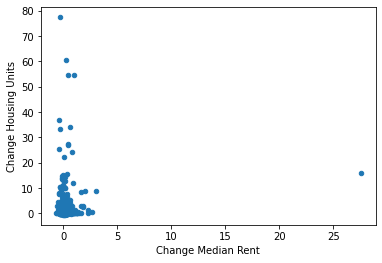

In [32]:
#make a scatter plot of Median Rent and Housing Units
df.plot.scatter(x = 'Change Median Rent',
               y = 'Change Housing Units')

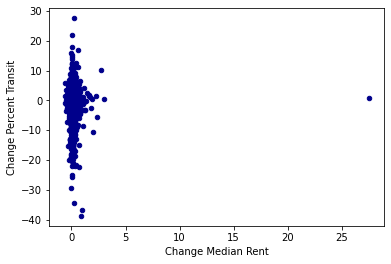

In [33]:
#make a scatter plot of Median Rent and Transit Use
df.plot.scatter(x = 'Change Median Rent',
               y = 'Change Percent Transit',
c = 'DarkBlue')

# Maps

Using the geopandas library we are able to create maps for our data. The maps use the data sets imported from Social Explorer and LA Tracts.

In [34]:
import geopandas as gpd

In [35]:
#import LA Tracts data 
tracts = gpd.read_file('Data/LA_Tracts.geojson')

In [36]:
tracts.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [37]:
#we only really need FIPS and geometry, so let's subset the data
tracts = tracts[['name','geometry']]

In [38]:
#rename the columns
tracts.columns = ['FIPS','geometry']

In [39]:
tracts.head()

,FIPS,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [40]:
# create a new dataframe based on the join
tracts_data=tracts.merge(df,on="FIPS")

In [41]:
tracts_data.head()

,FIPS,geometry,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,2010 Housing Units,2010 Median Gross Rent,2010 Percent Transit,2018 Housing Units,2018 Median Gross Rent,2018 Percent Transit,Change Housing Units,Change Median Rent,Change Percent Transit
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...","Census Tract 1011.10, Los Angeles city (part),...","Census Tract 1011.10, Los Angeles city (part),...",06,037,101110,1748,1205.0,1.48,1743,1609.0,2.39,-0.002860,0.335270,0.91
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031...","Census Tract 1011.22, Los Angeles city (part),...","Census Tract 1011.22, Los Angeles city (part),...",06,037,101122,1393,1581.0,1.92,1391,2120.0,0.37,-0.001436,0.340923,-1.55
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859...","Census Tract 1012.10, Los Angeles city (part),...","Census Tract 1012.10, Los Angeles city (part),...",06,037,101210,2331,1285.0,4.14,2402,1318.0,3.43,0.030459,0.025681,-0.71
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859...","Census Tract 1012.20, Los Angeles city (part),...","Census Tract 1012.20, Los Angeles city (part),...",06,037,101220,1296,1038.0,0.00,1328,1198.0,3.64,0.024691,0.154143,3.64
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719...","Census Tract 1013, Los Angeles city (part), Sa...","Census Tract 1013, Los Angeles city (part), Sa...",06,037,101300,1547,1398.0,0.00,1584,2435.0,4.21,0.023917,0.741774,4.21


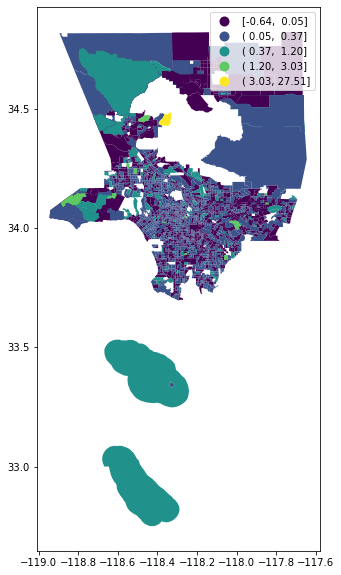

In [42]:
tracts_data.plot(figsize=(12,10),
                 column='Change Median Rent',
                 legend=True, 
                 scheme='NaturalBreaks')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

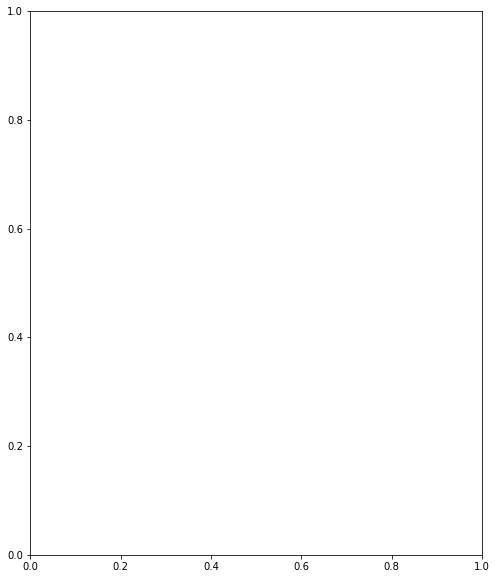

In [43]:
tracts_data.plot(figsize=(12,10),
                 column='Change Housing Units',
                 legend=True, 
                 scheme='NaturalBreaks')

In [44]:
tracts_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2904 entries, 0 to 2903
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   FIPS                    2904 non-null   object  
 1   geometry                2904 non-null   geometry
 2   Geo_NAME                2904 non-null   object  
 3   Geo_QName               2904 non-null   object  
 4   Geo_STATE               2904 non-null   object  
 5   Geo_COUNTY              2904 non-null   object  
 6   Geo_TRACT               2904 non-null   object  
 7   2010 Housing Units      2904 non-null   int64   
 8   2010 Median Gross Rent  2426 non-null   float64 
 9   2010 Percent Transit    2577 non-null   float64 
 10  2018 Housing Units      2904 non-null   int64   
 11  2018 Median Gross Rent  2809 non-null   float64 
 12  2018 Percent Transit    2865 non-null   float64 
 13  Change Housing Units    2865 non-null   float64 
 14  Change Median Re

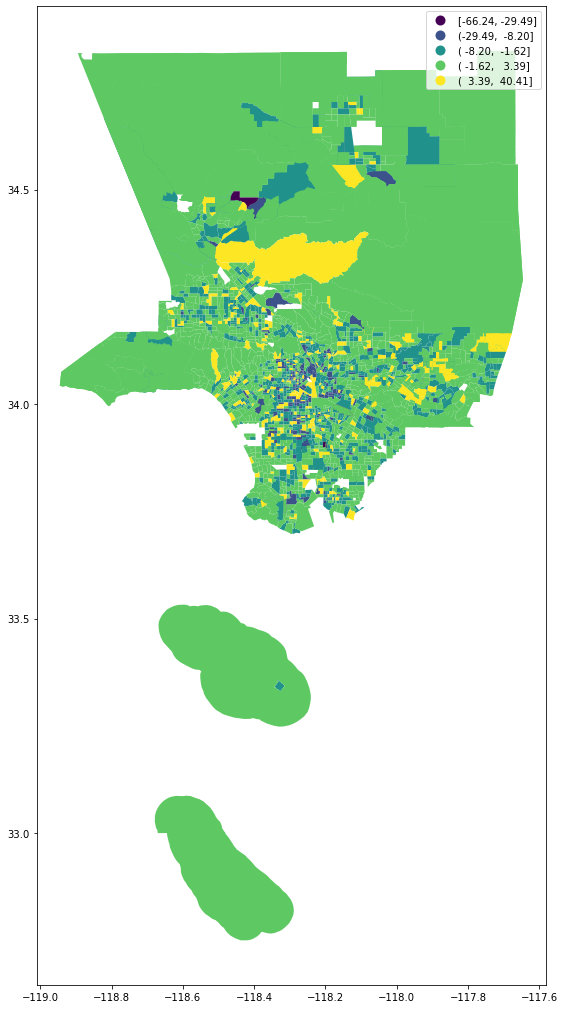

In [45]:
tracts_data.plot(figsize=(18,18),
                 column='Change Percent Transit',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
import folium

In [ ]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts_data, # geo data
                  data=tracts_data, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Change Percent Transit'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Change in Transit Use)').add_to(m)    # name on the legend color bar
m